In [4]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.datasets import *
from sklearn.model_selection import train_test_split

<h2> Self-Training </h2>

In [16]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)

In [17]:
from sklearn.svm import SVC 
n_splits = 3
clf = SVC(kernel='rbf', C=1, gamma=0.1)
x_values = np.arange(0.4, 1.05, 0.05)
# x_values = np.append(x_values, 0.99999)

scores, amount_labeled, amount_iterations = (np.empty((x_values.shape[0], n_splits)) for _ in range(3))
x_values

array([0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 ,
       0.95, 1.  ])

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.semi_supervised import SelfTrainingClassifier

for i, threshold in enumerate(x_values):
    self_training_clf = SelfTrainingClassifier(clf, threshold=threshold)

    skfolds = StratifiedKFold(n_splits=n_splits)
    for fold, (train_idx, test_idx) in enumerate(skfolds.split(X,y)):
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]
        
        # fit
        self_training_clf.fit(X_train, y_train)
        amount_labeled[i, fold] = y_train.shape[0] - np.unique(self_training_clf.labeled_iter_, return_counts=True)[1][0]
        amount_iterations[i, fold] = np.max(self_training_clf.labeled_iter_)

        y_pred = self_training_clf.predict(X_test)
        scores[i, fold] = accuracy_score(y_test, y_pred)


/opt/homebrew/anaconda3/envs/aman/lib/python3.9/site-packages/sklearn/semi_supervised/_self_training.py:227: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)
/opt/homebrew/anaconda3/envs/aman/lib/python3.9/site-packages/sklearn/semi_supervised/_self_training.py:227: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)
/opt/homebrew/anaconda3/envs/aman/lib/python3.9/site-packages/sklearn/semi_supervised/_self_training.py:227: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)
/opt/homebrew/anaconda3/envs/aman/lib/python3.9/site-packages/sklearn/semi_supervised/_self_training.py:227: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)
/opt/homebrew/anaconda3/envs/aman/lib/python3.9/site-packages/sklearn/semi_supervised/_self_training.py:227: UserWarning: y cont

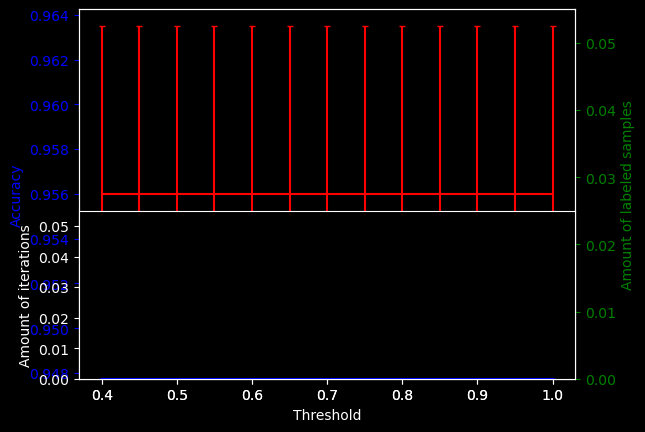

In [24]:
from matplotlib import pyplot as plt
ax1 = plt.subplot()
ax1.errorbar(
    x_values, scores.mean(axis=1), yerr=scores.std(axis=1), capsize=2, color="r"
)
ax1.set_ylabel("Accuracy", color="b")
ax1.tick_params("y", colors="b")

ax2 = ax1.twinx()
ax2.errorbar(
    x_values,
    amount_labeled.mean(axis=1),
    yerr=amount_labeled.std(axis=1),
    capsize=2,
    color="g",
)
ax2.set_ylim(bottom=0)
ax2.set_ylabel("Amount of labeled samples", color="g")
ax2.tick_params("y", colors="g")

ax3 = plt.subplot(212, sharex=ax1)
ax3.errorbar(
    x_values,
    amount_iterations.mean(axis=1),
    yerr=amount_iterations.std(axis=1),
    capsize=2,
    color="b",
)
ax3.set_ylim(bottom=0)
ax3.set_ylabel("Amount of iterations")
ax3.set_xlabel("Threshold")

plt.show()